In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('final_dataset.csv')

In [44]:
# all the columns except the last column in final dataset are the 
# independent variables that will be trained to predict the output

X = data.drop(['PrecipitationSumInches'], axis = 1)
X.ndim

2

In [46]:
# Y is the output, i.e the last column of dataset
Y = data['PrecipitationSumInches']

print(Y.ndim)
# reshape it into a 2D vector because
# when we apply the fit function we get an error
# because it expects a 2D array
# so Reshape
Y = Y.values.reshape(-1, 1)
print(Y.ndim)


1
2


In [62]:
# Taking a random day for classification
res_day = 798
days = [i for i in range(Y.size)]


In [63]:
# lr is a Linear Regression object
lr = LinearRegression()

# fit our data to the object
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Give a sample input to test our model
# a 2D vector having sample values for all the columns to test

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], 
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]]) 

print(inp)
print("Reshape")
# Reshape where ever we have 1, it adds a attribute just to convert
# into a 2D array. Where as -1 states that it has to remain as it is
# for example here 1, -1 means, that number of columns will remain as it is
# but it'll create a row for those 100 cols, so as to make a 2D array
# NEW DIMENSION IS ADDED WHEREIN WE SPECIFY 1
inp = inp.reshape(1, -1)
print(inp)

[[74.  ]
 [60.  ]
 [45.  ]
 [67.  ]
 [49.  ]
 [43.  ]
 [33.  ]
 [45.  ]
 [57.  ]
 [29.68]
 [10.  ]
 [ 7.  ]
 [ 2.  ]
 [ 0.  ]
 [20.  ]
 [ 4.  ]
 [31.  ]]
Reshape
[[74.   60.   45.   67.   49.   43.   33.   45.   57.   29.68 10.    7.
   2.    0.   20.    4.   31.  ]]


In [65]:
# Now we have trained our dataset
# We are ready to predict the output
print('The precipitation in inches for the given input is: ', lr.predict(inp))

The precipitation in inches for the given input is:  [[1.33868402]]


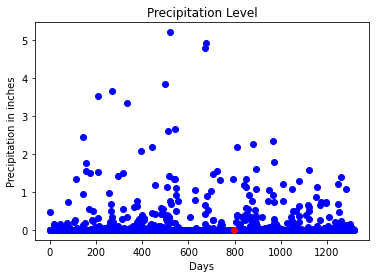

In [66]:
# Plot the graph of precipitaion levels
# versus the total number of days
# one dat, which is in red, is
# tracked here. It has a precipitation of 1.33
plt.scatter(days, Y, color= 'blue')
plt.scatter(days[res_day], Y[res_day], color= 'red')
plt.title("Precipitation Level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

Precipitation vs selected attributes graph: 


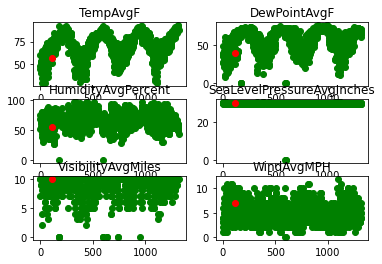

In [61]:
plt.show() 
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 
                  'WindAvgMPH'], axis = 1) 
  
# plot a graph with a few features (x values) 
# against the precipitation or rainfall to observe 
# the trends 
  
print("Precipitation vs selected attributes graph: ") 
  
for i in range(x_vis.columns.size): 
    plt.subplot(3, 2, i + 1) 
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], 
                                               color = 'g') 
  
    plt.scatter(days[res_day],  
                x_vis[x_vis.columns.values[i]][res_day], 
                color ='r') 
  
    plt.title(x_vis.columns.values[i]) 
  
plt.show() 